# Submission for Mini Project 2--Manuel Serna-Aguilera
Name: Manuel Serna-Aguilera

CSCE 5063 Machine Learning

Spring 2022

# Miniproject 2 : Linear Regression
In this mini project we will implement linear regression      
-Dataset Ames Housing Dataset

We will learn:    
    How to implement our own Simple Linear Regression and Multiple Linear Regression using Gradient Descent.    
    How to use built in Scikit Learn Library to do the same tasks. 
    Some other little trick and tweaks on data pre processing and visualization. 

    (Note you do not need glmnet or statmodels for this. You could use statmodel library instead of scikit learn but here we will use scikit learn.)


### Import all libraries and depandancies. 
I import everything that I installed in the environment, so I do not have to worry about it later. But it is not always a best practice to do so.     
Note: I use mlxtend to do some scatter plot. You will need to install mlxtend library on your environment  using      

(csce5063) unakarmi@cover:~/Courses$ conda install -c conda-forge mlxtend

Details about mlxtend on : 
https://anaconda.org/conda-forge/mlxtend

For students who are not familiar with Python Class and objects this mini-project is a good opportunity to learn how to create your own python class, memeber fucntions and class objects.




In [1]:
import sys
import torch
import pandas as pd
import sklearn as sk
import IPython as ipy
import numpy as np
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
import statsmodels as sm
import scipy as sp
#import pydot as pdt
import patsy as pat
#import glmnet as gln

import matplotlib.pyplot as plt

import mlxtend
from mlxtend.plotting import scatterplotmatrix    # For scatter plots of columns of dataframe

### Load Dataset and Explore Data

- Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
- Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf

Dataset has many predcitors/input variable. We will only use 5 input variables and a output varaible (SalePrice) defined in columns. 

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)
df.head()  
             

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [3]:
df.shape

(2930, 6)

### Preprocess Data
-Remove null   
-Map Central Air from Y(Yes) No(N)  to 1 and 0

In [4]:
# Remove rows that contain missing values and check if there exist any null
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [5]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [6]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df.head()
# Note how the values for Central Air Input has changed fron Y N to 1 0

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


### Visualization of relation between different columns in data (inputs and output)

For this, I use mlxtend library. This is a great library for many visualization using matplotlib. If you prefer to write your own feel free to do so.  

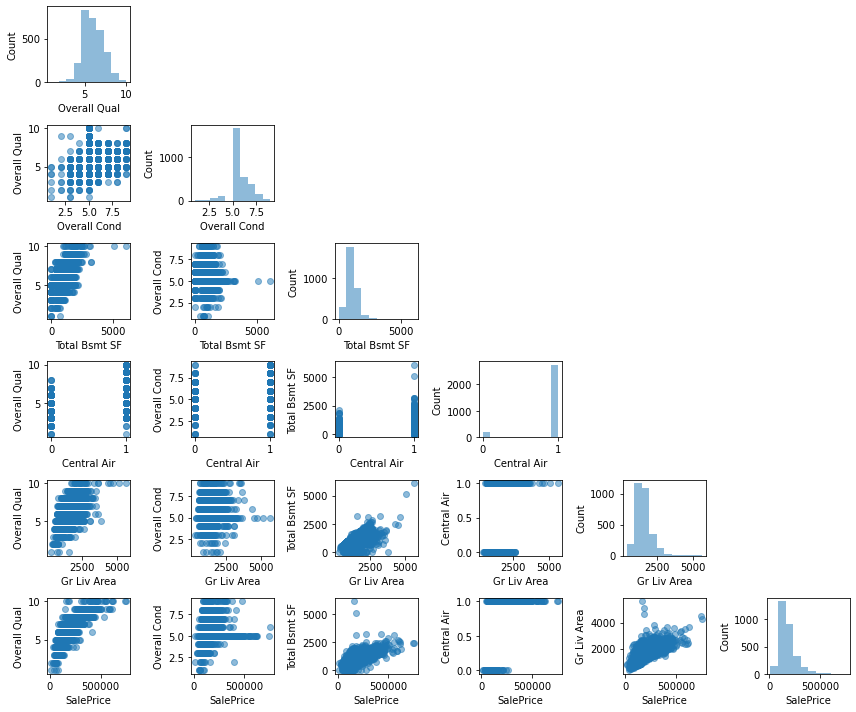

In [7]:
scatterplotmatrix(df.to_numpy(), figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

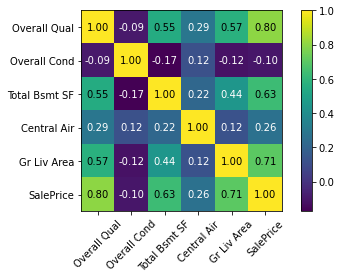

In [8]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.to_numpy().T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
plt.show()

## Task 1: DONE
Implement Simple Linear Regression using Gradient Descent.     
For Task 1, I have provided most of the code, you just need to fill in an appropriate expression for errors term in the fit() fucntion below on the line with "Write your error term here". 
You might want to look at the last lecture for linear regression and find out how we compute Gradient 



### Task 1 Response
* I added `errors = y - output` in the training loop.

In [9]:
# A Simple class for performing Simple Linear Regression using Gradient Descent(GD). 
# 
class SLRGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        ''' Constructor
        param eta: (number) learning rate/step
        param n_iter: (int) number of times to iterate over all data samples X
        param random_state: maybe seed for RNG
        '''
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        # Parameters
        self.beta = None
        self.intercept = None
        
        # Loss
        self.losses = None
    
    # A member function that fits input X to output y using GD
    def fit(self, X, y):
        ''' Fit linear reg. classifier to data
        param X: (numpy ndarray) (N, 1)-shaped array for N data samples
            NOTE: data put through StandardScaler() from sklearn
        param y: (numpy ndarray) (N,)-shaped array for corresponding samples' outputs
            NOTE: data put through StandardScaler() from sklearn
        
        return: SLRGD object ready for classification
        '''
        rgen = np.random.RandomState(self.random_state)
        self.beta = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.intercept = np.array([0.])
        self.losses = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output

            # Update parameters of Linear Regression
            self.beta+= self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.intercept += self.eta * 2.0 * errors.mean()
            
            loss = (errors**2).mean()
            self.losses.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.beta) + self.intercept

    def predict(self, X):
        '''
        param X: (numpy ndarray) (N, 1)-shaped array for N data samples
            NOTE: data put through StandardScaler()
        return: (ndarray) TODO
        '''
        return self.net_input(X)

In [10]:
# Use ' Gr Liv Area ' as an input to test our SLRGD
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [11]:
print('X ({}):\n{}'.format(X.shape, X))

X ((2929, 1)):
[[1656]
 [ 896]
 [1329]
 ...
 [ 970]
 [1389]
 [2000]]


In [12]:
# Standarize in Input and  output before performing SLR 
#  (For Linear Regression with Least sqaure we can actually do wihtout 
#  standarization but here we will standarize for the sake of our understanding)
# We will use sklearn StandardSclaer class to standarize the inputs and outputs. 
#  You might want to look for some information on StandardSclaer. 
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler() 
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

SLR coefficient beta =  [0.70661837]
SLR intercept =  [-1.58289223e-16]


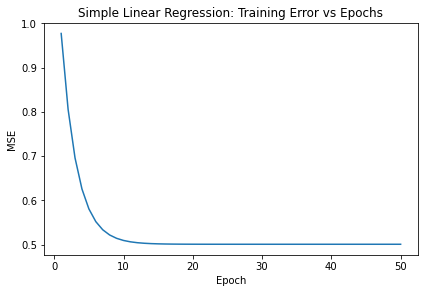

In [13]:
# Fit Simple Linear Regression Model on y vs X, print coeff of 
#  simple linear regression and show error plot
SLR = SLRGD(eta=0.1)  # Try with different eta values: eta = 0.01 , 0.1, 0.5 and notice how yout error vs epochs curve changes. 
SLR.fit(X_std, y_std)
print('SLR coefficient beta = ', SLR.beta)
print('SLR intercept = ', SLR.intercept)
plt.plot(range(1, SLR.n_iter+1), SLR.losses)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.title('Simple Linear Regression: Training Error vs Epochs')
plt.show()

In [14]:
# Fucntion to plot Simple Linear Regression  and plot SLR curve(line) we just computed
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=25)
    plt.plot(X, model.predict(X), color='red', lw=1)    
    return 

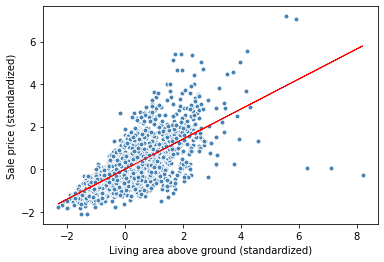

In [15]:
# Plot the Simple Linear Regression we computed for Sales vs Living Area
lin_regplot(X_std, y_std, SLR)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [16]:
# Predict the Housing Price for some living area using predict() in SLRGD we performed
area = np.array([[3000]])
input_std = sc_x.transform(area)
output_std = SLR.predict(input_std)
print('*scaled* output: ', output_std) 
# Note this output value (Sales price) does not make sense. 
#  We need to transform back the sales

*scaled* output:  [2.09740902]


In [17]:
target_reverted = sc_y.inverse_transform(output_std.reshape(-1, 1)) # Note we need to transform the target back to orginal scale
print(f'Sale price: ${target_reverted.flatten()[0]:.3f}')
# Note the new invserse transformed predicted Sales price for a house with 
#  living area space of 3000 makes sense now. 

Sale price: $348339.418


## Task 2: DONE
a) Immplement Multiple Linear Regression     
 
Create LRGD class similar to SLRGD class but is able to perform multiple linear regression. i.e. take more than 1 input. 

### Task 2 Response
* The class `LRGD` is very much the same as `SLRGD`, except our self.beta is now potentially greater than 1. Nothing really new was added on top of the `SLRGD` class.

In [18]:
class LRGD:
    ''' Linear Regression Classifier class
    - Allows for use of more than one input variable
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        ''' Constructor
        param eta: (number) learning rate/step
        param n_iter: (int) number of times to iterate over all data samples X
        param random_state: maybe seed for RNG
        '''
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        # Parameters
        self.beta = None
        self.intercept = None
        
        # Loss
        self.losses = None
    
    def fit(self, X, y):
        ''' Fit linear reg. classifier to data
        param X: (numpy ndarray) (N, p)-shaped array for N data samples for p predictors
            NOTE: data put through StandardScaler() from sklearn
        param y: (numpy ndarray) (N,)-shaped array for corresponding samples' outputs
            NOTE: data put through StandardScaler() from sklearn
        
        return: LRGD object ready for classification
        '''
        n = X.shape[0] # number of samples
        p = X.shape[1] # number of coefficients for each predictor
        rgen = np.random.RandomState(self.random_state)
        self.beta = rgen.normal(loc=0.0, scale=0.01, size=p)
        self.intercept = np.array([0.])
        self.losses = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            dE = y - output

            # Update parameters of Linear Regression
            self.beta += self.eta * 2.0 * X.T.dot(dE) / n
            self.intercept += self.eta * 2.0 * dE.mean()
            
            loss = (dE**2).mean()
            self.losses.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.beta) + self.intercept

    def predict(self, X):
        '''
        param X: (numpy ndarray) (N, p)-shaped array for N data samples for p predictors
            NOTE: data put through StandardScaler()
        return: (ndarray) TODO
        '''
        return self.net_input(X)

## Task 3: DONE

a) Perform Multiple Linear Regression on SalePrice vs 5 inputs ('Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', ) using your new LRGD class.    
           
b) Print all the coefficients of linear Regression like we did above for SLRGD. Now you will have intercept and many other coefficients.        
           
Note: You might need to first convert categorical variable 'Central Air'  to dummy variable using pd.getdummies() to get dummy variable, pd.drop() to drop the origianl 'Central Air' input and then add dummy variables you created for 'Central Air' into your input dataframe.

### Task 3 Response
* First I prepare the input data `X_mult` that will be fed into the `LRGD` class (and eventually the linear regression object from sklearn. ***Note that all classifiers train and predict on the scaled data values***.
* `beta_1` corresponds to the `Gr Liv Area` input, `beta_2` corresponds to `Central Air`, etc. Essentially, the ordering of the column labels for the dataframe reversed.

### Prepare dataset

In [19]:
# Keep names for inputs.
# Regression models will have the coefficients in this order
names = ['Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'Overall Cond', 'Overall Qual']

In [20]:
# Display dataframe with categorical var CentralAir
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [21]:
# Convert categorical var CentralAir to dummy values
df['Central Air'] = pd.factorize(df['Central Air'])[0]
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,0,1656,215000
1,5,6,882.0,0,896,105000
2,6,6,1329.0,0,1329,172000
3,7,5,2110.0,0,2110,244000
4,5,5,928.0,0,1629,189900


In [22]:
# Assemble data
X_mult = df[['Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'Overall Cond', 'Overall Qual']].values
y = df['SalePrice'].values

print('X_mult ({}):\n{}'.format(X_mult.shape, X_mult))
#print(y)

X_mult ((2929, 5)):
[[1656.    0. 1080.    5.    6.]
 [ 896.    0.  882.    6.    5.]
 [1329.    0. 1329.    6.    6.]
 ...
 [ 970.    0.  912.    5.    5.]
 [1389.    0. 1389.    5.    5.]
 [2000.    0.  996.    5.    7.]]


In [23]:
# Preprocess data for training and testing
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std_mult = sc_x.fit_transform(X_mult)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

### (a) Perform MLR on SalePrice vs. the five input variables
NOTE: MLR was performed on the **scaled** input data (```X_std_mult```).

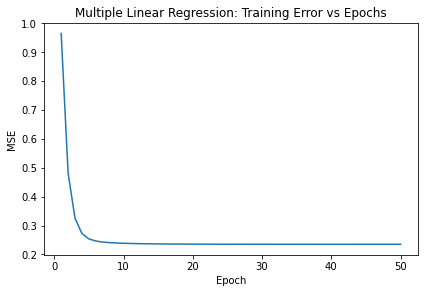

In [24]:
# Fit classifier
MLR = LRGD(eta=0.1)
MLR.fit(X_std_mult, y_std)
plt.plot(range(1, MLR.n_iter+1), MLR.losses)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.title('Multiple Linear Regression: Training Error vs Epochs')
plt.show()

In [25]:
# Test classifier on test data and compare actual with predicted
area = np.array([[1656, 0, 1080, 5, 6]])
input_std = sc_x.transform(area)
output_std = MLR.predict(input_std)
target_reverted = sc_y.inverse_transform(output_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.3f}')

Sale price: $187737.386


### (b) Print coefficients and intercepts

In [26]:
print('MLR coeffs beta:')
for i in range(len(names)):
    print('{}: {:.6f}'.format(names[i], MLR.beta[i]))

print('MLR intercept: {:.6f}'.format(MLR.intercept[0]))

MLR coeffs beta:
Gr Liv Area: 0.334462
Central Air: -0.036452
Total Bsmt SF: 0.215705
Overall Cond: 0.015653
Overall Qual: 0.480484
MLR intercept: -0.000000


## Task 4: DONE

a) Use Scikit Learn library to do Simple Linear Regression and Multiple Linear Regression on Housing Data. For Simple Linear Regression you can only do for 'Gr Liv Area' as input variable.

b) Print all coefficients for both cases. 

c) Compare your coefficients from SLRGD, LRGD and ones that you got from using Scikit learn library. 

### Task 4 Responses
* My own and sklearn's coefficients appear to be very similar. The intercepts are almost zero, but the digits starting from the third from the left begin to differ greatly.

### (a) Use sklearn to perform simple linear reg. and multiple linear reg.

In [27]:
lr_model = sk.linear_model.LinearRegression()
lr_model.fit(X_std, y_std)

mlr_model = sk.linear_model.LinearRegression()
mlr_model.fit(X_std_mult, y_std)

LinearRegression()

### (b) Print sklearn coeffs for both regression tasks

In [28]:
sk_lr_coeffs = [lr_model.intercept_] + [lr_model.coef_[0]]

In [29]:
sk_mlr_coeffs = [mlr_model.intercept_] + [x for x in mlr_model.coef_[:]]

In [30]:
print('Linear Reg. coeffs (sklearn)')
print('coeff (Gr Liv Area): {:.6f}'.format(sk_lr_coeffs[1]))
print('intercept: {:.6f}'.format(sk_lr_coeffs[0]))

print()
print('Multi Linear Reg. coeffs (sklearn)')
for i in range(len(names)):
    print('{}: {:.6f}'.format(names[i], sk_mlr_coeffs[i]))

Linear Reg. coeffs (sklearn)
coeff (Gr Liv Area): 0.706628
intercept: -0.000000

Multi Linear Reg. coeffs (sklearn)
Gr Liv Area: -0.000000
Central Air: 0.333200
Total Bsmt SF: -0.036012
Overall Cond: 0.214766
Overall Qual: 0.015585


### (c) Compare my own and sklearn's coeffs

In [31]:
# Simple linear reg.
print('Linear Reg. Parameters:')
print('              mine\tsklearn')
print('[Gr Liv Area] {:.6f}\t{:.6f}'.format(SLR.beta[0], sk_lr_coeffs[1]))
print('[intercept]   {:.6f}\t{:.6f}'.format(SLR.intercept[0], sk_lr_coeffs[0]))

Linear Reg. Parameters:
              mine	sklearn
[Gr Liv Area] 0.706618	0.706628
[intercept]   -0.000000	-0.000000


In [32]:
# Multi linear reg.
print('Multi-Linear Reg. Parameters:')

print('[intercept]\tmine: {:.6f}\tsklearn: {:.6f}'.format(MLR.intercept[0], sk_lr_coeffs[0]))
for i in range(len(names)):
    print('[{}]\tmine: {:.6f}\tsklearn: {:.6f}'.format(names[i], MLR.beta[i], sk_mlr_coeffs[i+1]))

Multi-Linear Reg. Parameters:
[intercept]	mine: -0.000000	sklearn: -0.000000
[Gr Liv Area]	mine: 0.334462	sklearn: 0.333200
[Central Air]	mine: -0.036452	sklearn: -0.036012
[Total Bsmt SF]	mine: 0.215705	sklearn: 0.214766
[Overall Cond]	mine: 0.015653	sklearn: 0.015585
[Overall Qual]	mine: 0.480484	sklearn: 0.482690


## Task 5 Multiple Linear Regression with modified input variable: DONE   
Sometimes when we plot some input variable vs response, we might notice that the relation between input and response is highly-nonlinear (eg. quadratic) and we might want to include a quadratic term of that input variable in our linear regression. For example lets say we want to model a liner regression by assuming Salesprice is quadratic to 'Total Bsmt SF'. We can introduce a new input variable square of Total Bsmt SF.     
 
-Create a new variable 'Mod Total Bsmt SF' = Total Bsmt SF*Total Bsmt SF. 
-Replace 'Total Bsmt SF' variable  with new varaible you created 'Mod Total Bsmt SF'
-Do Multiple Linear Regression using scikit learn  using new input dataframe that has ('Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Mod Total Bsmt SF') as inputs.     
-Compare Coeff you got in original multiple linear regression vs one with modified input. 
Make sure the order of all inputs are same in both cases: For example if 'Central Air' is 4th column in your original input data frame, make sure it is also in 4th column and so and so forth for other variables as well. 

In [33]:
# Get new dataframe--df with third predictor squared
df['Mod Total Bsmt SF'] = df['Total Bsmt SF']**2
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice,Mod Total Bsmt SF
0,6,5,1080.0,0,1656,215000,1166400.0
1,5,6,882.0,0,896,105000,777924.0
2,6,6,1329.0,0,1329,172000,1766241.0
3,7,5,2110.0,0,2110,244000,4452100.0
4,5,5,928.0,0,1629,189900,861184.0


In [34]:
# Create new input matrix X2
X2 = df[['Gr Liv Area', 'Central Air', 'Mod Total Bsmt SF', 'Overall Cond', 'Overall Qual']].values
y = df['SalePrice'].values

In [35]:
# Transform input from new df (what we will train reg model on)
X_std_mod = sc_x.fit_transform(X2)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [36]:
# Perform MLR again with new df
mod_model = sk.linear_model.LinearRegression()
mod_model.fit(X_std_mod, y_std)

LinearRegression()

In [37]:
mod_coeffs = [mod_model.intercept_] + [x for x in mod_model.coef_[:]]

***Note*** that the coefficient for `modified` for row `Total Bsmt SF` is the modified variable (i.e., `Total Bsmt SF**2`).

In [38]:
# Compare coefficients
new_names = names

print('sklearn coefficients')
print('[intercept]\toriginal:{:.6f}\tmodified:{:.6f}'.format(sk_mlr_coeffs[0], mod_coeffs[0]))

for i in range(0, len(new_names)):
    print('[{}]\toriginal: {:.6f}\tmodified: {:.6f}'.format(
        new_names[i], 
        sk_mlr_coeffs[i+1],
        mod_coeffs[i+1]
        )
    )

sklearn coefficients
[intercept]	original:-0.000000	modified:-0.000000
[Gr Liv Area]	original: 0.333200	modified: 0.339621
[Central Air]	original: -0.036012	modified: -0.052770
[Total Bsmt SF]	original: 0.214766	modified: 0.120692
[Overall Cond]	original: 0.015585	modified: 0.000959
[Overall Qual]	original: 0.482690	modified: 0.534252


***Note*** that the coefficient for `modified` for row `Total Bsmt SF` is the modified variable (i.e., `Total Bsmt SF**2`).